In [422]:
import harmony
import palantir
import scGAM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as npn
import scanpy.external as sce
import numpy as np

In [2]:
plt.rcParams['font.family'] = "sans-serif"

In [3]:
sc.settings.verbosity = 3  
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                         9.1.1
anyio                       NA
asciitree                   NA
attr                        21.2.0
babel                       2.9.1
backcall                    0.2.0
brotli                      NA
certifi                     2022.12.07
cffi                        1.15.0
charset_normalizer          2.0.7
cloudpickle                 2.2.0
colorama                    0.4.6
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.12.1
dask                        2023.5.1
dateutil                    2.8.2
debugpy                     1.5.0
decorator                   5.1.1
defusedxml                  0.7.1
dill                        0.3.6
entrypoints                 0.3
fasteners                   0.18
fastjsonschema              NA
google                      NA
h5py                        3.7.0
idna                        3.3
igraph                      0.10.3
ipykernel 

In [4]:
# samples_dict = {"Immature": "A0021_043", "0hr": "A0008_041", "1hr": "A0021_044", "4hr": "A0008_045", "4hr_replicate": "A0021_042", "6hr": "A0021_045", "8hr": "A0008_044", "8hr_replicate": "A0021_038", "11hr": "A0008_046", "12hr": "A0021_046"}
samples_dict = {"Immature": "A0021_043", "0hr": "A0008_041", "1hr": "A0021_044", "4hr": "A0021_042", "6hr": "A0021_045", "8hr": "A0008_044", "11hr": "A0008_046", "12hr": "A0021_046"}

In [11]:
s_genes = list(pd.read_csv("./../../../../MouseInfection/s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../../../../MouseInfection/g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [13]:
adata_ovary_combined = sc.read_h5ad("./../../pyobjs_github/adata_ovary_combined_processed_deconvoluted_newscaling.h5ad")
adata_ovary_combined

AnnData object with n_obs × n_vars = 121536 × 2537
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'individual_leiden_1.0', 'individual_leiden_1.2', 'individual_leiden_1.5', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden_1.0', 'leiden_1.5', 'Level1_total_abundance', 'Level1_EN_Blood', 'Level1_EN_Lymph', 'Level1_Epithelium', 'Level1_GC_Antral', 'Level1_GC_Atretic', 'Level1_GC_CL_Active', 'Level1_GC_CL_Lytic', 'Level1_GC_Estrous', 'Level1_GC_Mitotic', 'Level1_GC_Mural', 'Level1_GC_Preantral', 'Level1_I_B_Cell', 'Level1_I_Dendritic_Cell', 'Level1_I_Granulocyte', 'Level1_I_Macrophage', 'Level1_I_T_Cell', 'Level1_M_Cortical Stroma', 'Level1_M_Dividing Mesenchyme', 'Level1_M_Immature Theca', 'Level1_M_Medullary Stroma', 'Level1_M_Pericyte', 'Level1_M_Smooth Muscle', 'Level1_M_Steroidogenic Theca', 'Level1_Oocyte', 'Level1_max_pred', 'Level1_max_pred_celltype', 'Level1_max_pred_celltype_group', 'Level0_total_abundance', 'L

In [14]:
freq_table = adata_ovary_combined.obs.groupby(['Sample', 'Level0_max_pred_celltype']).size().reset_index(name='count')
# freq_table = freq_table[~freq_table["Follicle_type"].isin(["Transitioning"])]
freq_table['total_count'] = freq_table.groupby(["Sample"])['count'].transform('sum')
freq_table['proportion'] = freq_table['count'] / freq_table['total_count']
freq_table["Sample"] = freq_table["Sample"].astype("category")
freq_table["Sample"] = freq_table["Sample"].cat.reorder_categories(["Immature", "0hr", "1hr", "4hr", "6hr", "8hr", "11hr", "12hr"])
# freq_table["Follicle_type"] = freq_table["Follicle_type"].astype("category")
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.remove_categories(["Transitioning"])
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.reorder_categories(["Preantral", "Antral", "Atretic", "Lytic"])

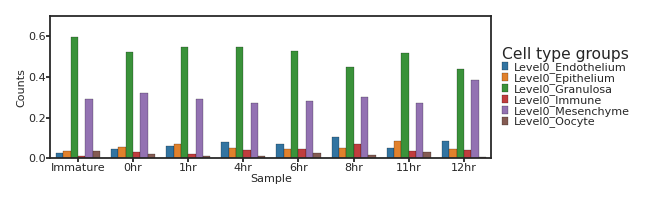

In [15]:
sc.settings.set_figure_params(dpi=80, fontsize=5, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (4.0,1.2))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size = 2)
sns.barplot(freq_table, y = "proportion", x = "Sample", hue="Level0_max_pred_celltype",  dodge=True, palette="tab10", ax=ax, 
           linewidth=0.1, edgecolor="black")
ax.get_legend().remove()
plt.legend(ncol=1, prop={'size': 5}, handletextpad=0.5, markerscale = 0.6, title = "Cell type groups",
           labelspacing = 0.0, frameon = False,  title_fontsize = 7, alignment = "left", loc = 6,
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (1.02, 0.5))
plt.rcParams['legend.title_fontsize'] = 9
ax.set_ylim(0,0.7)
ax.set_ylabel("Counts", labelpad = 1.0)
ax.set_xlabel("Sample", labelpad = 0.5)
plt.tight_layout()
plt.savefig("./figures/all_cells_stats.pdf")

In [16]:
mesenchyme = adata_ovary_combined.raw.to_adata()[adata_ovary_combined.obs["Level0_max_pred_celltype"] == "Level0_Mesenchyme"]
# mesenchyme = mesenchyme[mesenchyme.obs["Level0_Mesenchyme"] > 0.5,]
del adata_ovary_combined
mesenchyme.shape

(36838, 31053)

calculating cell cycle phase
computing score 'S_score'


/home/mm2937/.local/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


    finished: added
    'S_score', score of gene set (adata.obs).
    378 total control genes are used. (0:00:03)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    336 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


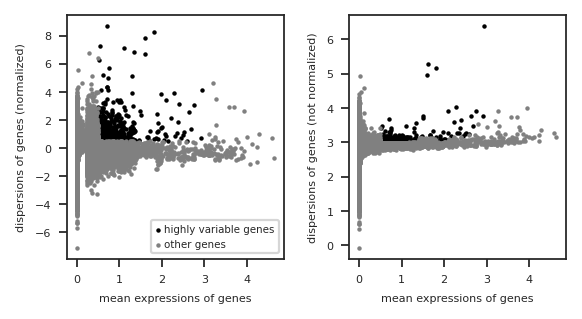

In [17]:
sc.tl.score_genes_cell_cycle(mesenchyme, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.highly_variable_genes(mesenchyme, min_mean=0.5, min_disp=0.5)
sc.pl.highly_variable_genes(mesenchyme)

In [18]:
print(sum(mesenchyme.var.highly_variable))

504


In [19]:
mesenchyme.raw = mesenchyme
mesenchyme = mesenchyme[:, mesenchyme.var.highly_variable]
print(mesenchyme.shape)

(36838, 504)


regressing out ['S_score', 'G2M_score', 'total_counts']
    sparse input is densified and may lead to high memory use


/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'phase' as categorical


    finished (0:00:32)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:04)


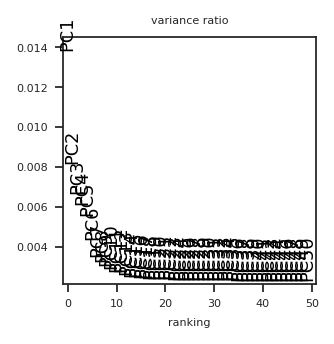

In [20]:
sc.pp.regress_out(mesenchyme, ['S_score', 'G2M_score', 'total_counts'])
sc.pp.scale(mesenchyme, max_value=10)
sc.pp.pca(mesenchyme, random_state= 0)
sc.pl.pca_variance_ratio(mesenchyme, n_pcs = 50)

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


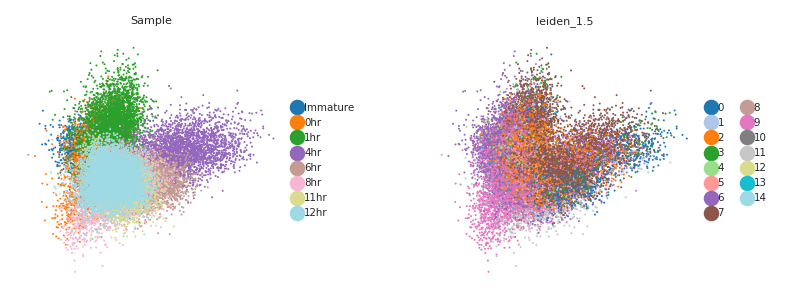

In [21]:
sc.pl.pca(mesenchyme, color = ["Sample", "leiden_1.5"])

In [22]:
sce.pp.harmony_integrate(mesenchyme, 'Sample')

2023-08-21 01:22:55,240 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2023-08-21 01:23:03,748 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2023-08-21 01:23:12,177 - harmonypy - INFO - Converged after 2 iterations
Converged after 2 iterations


In [24]:
mesenchyme.write_h5ad("./../../pyobjs_github/mesenchyme0.h5ad")

In [449]:
mesenchyme = sc.read_h5ad("./../pyobjs/mesenchyme0.h5ad")

In [25]:
mesenchyme.obsm["X_pca_backup"] = mesenchyme.obsm["X_pca"]
mesenchyme.obsm["X_pca"] = mesenchyme.obsm["X_pca_harmony"]
mesenchyme.obsm

AxisArrays with keys: X_pca, X_pca_harmony, X_umap, spatial, X_pca_backup

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


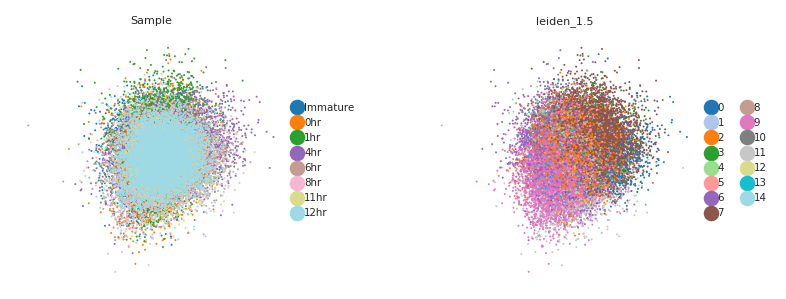

In [26]:
sc.pl.pca(mesenchyme, color = ["Sample", "leiden_1.5"])

In [27]:
sc.pp.neighbors(mesenchyme, use_rep="X_pca_harmony", n_pcs=50, key_added="harmony_nn")
sc.tl.umap(mesenchyme, neighbors_key="harmony_nn")

computing neighbors


/home/mm2937/.local/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mm2937/.local/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mm2937/.local/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The '

    finished: added to `.uns['harmony_nn']`
    `.obsp['harmony_nn_distances']`, distances for each pair of neighbors
    `.obsp['harmony_nn_connectivities']`, weighted adjacency matrix (0:00:23)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)


In [28]:
sc.tl.leiden(mesenchyme, key_added="mesenchyme_leiden_0.5", neighbors_key= "harmony_nn", resolution = 0.5)
sc.tl.leiden(mesenchyme, key_added="mesenchyme_leiden_0.8", neighbors_key= "harmony_nn", resolution = 0.8)
sc.tl.leiden(mesenchyme, key_added="mesenchyme_leiden_1.0", neighbors_key= "harmony_nn", resolution = 1.0)

running Leiden clustering
    finished: found 4 clusters and added
    'mesenchyme_leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:05)
running Leiden clustering
    finished: found 7 clusters and added
    'mesenchyme_leiden_0.8', the cluster labels (adata.obs, categorical) (0:00:08)
running Leiden clustering
    finished: found 11 clusters and added
    'mesenchyme_leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:07)


/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


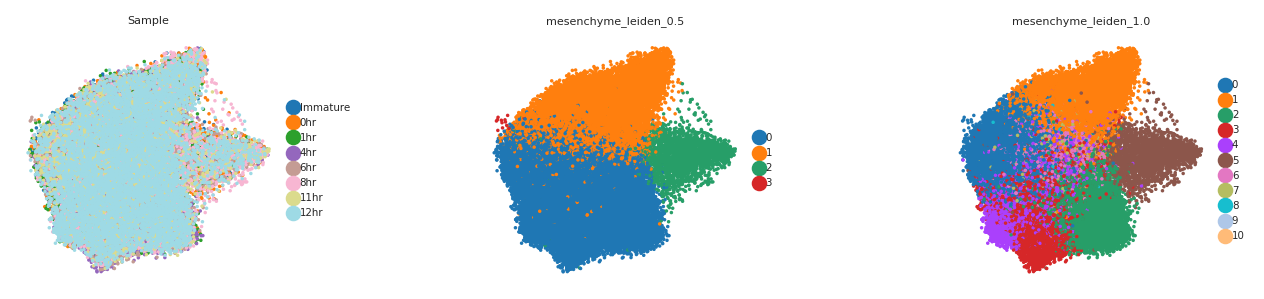

In [29]:
sc.pl.umap(mesenchyme, color = ["Sample", "mesenchyme_leiden_0.5", "mesenchyme_leiden_1.0"], ncols=4, wspace=0.6, size = 10)

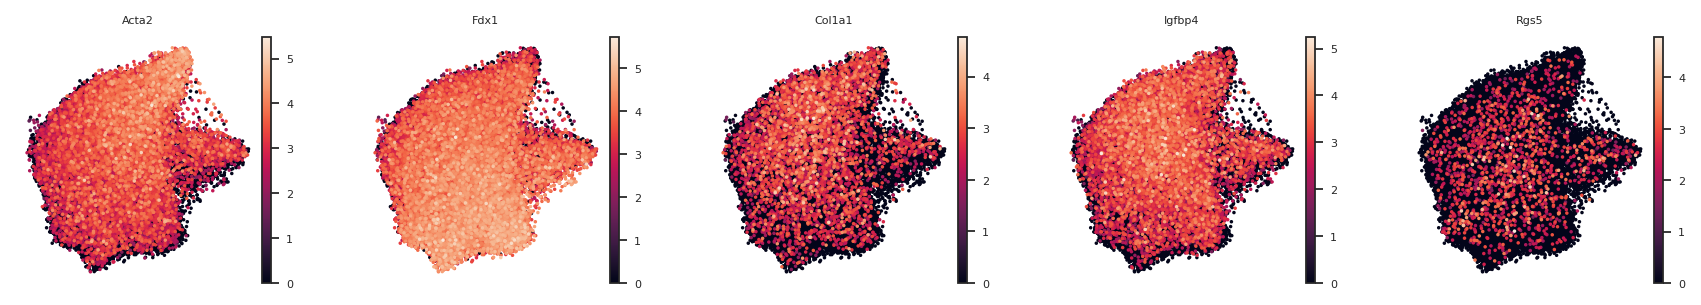

In [30]:
sc.pl.umap(mesenchyme, color = ["Acta2", "Fdx1", "Col1a1", "Igfbp4", "Rgs5"], ncols=5, wspace=0.3, size = 10)

In [31]:
mesenchyme_ct_list = [x for x in mesenchyme.obs.columns if x.startswith("Level1_M")]
# # for ct in mesenchyme_ct_list:
# #     data = mesenchyme.obs[ct].values
# #     mesenchyme.obs[ct] = np.clip(data,0, np.quantile(data, 0.90))
mesenchyme.obs["mesenchyme_max_pred"] = mesenchyme.obs[mesenchyme_ct_list].max(axis=1)
mesenchyme.obs["mesenchyme_max_pred_celltype"] = mesenchyme.obs[mesenchyme_ct_list].idxmax(axis=1)

In [32]:
mesenchyme.obs["mesenchyme_max_pred_celltype"].value_counts()

Level1_M_Smooth Muscle          13874
Level1_M_Steroidogenic Theca     8784
Level1_M_Medullary Stroma        4059
Level1_M_Immature Theca          3700
Level1_M_Pericyte                2434
Level1_M_Dividing Mesenchyme     2225
Level1_M_Cortical Stroma         1762
Name: mesenchyme_max_pred_celltype, dtype: int64

... storing 'mesenchyme_max_pred_celltype' as categorical
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


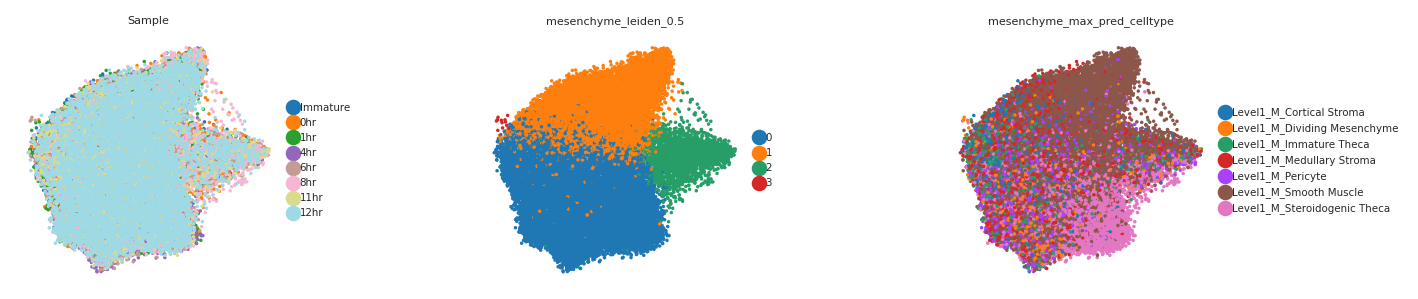

In [33]:
sc.pl.umap(mesenchyme, color = ["Sample", "mesenchyme_leiden_0.5", "mesenchyme_max_pred_celltype", ], ncols=4, wspace=0.6, size = 10)

In [34]:
sc.tl.rank_genes_groups(mesenchyme, groupby="mesenchyme_max_pred_celltype", key_added="rank_gene_groups_mesenchyme_max_pred_celltype")

ranking genes
    finished: added to `.uns['rank_gene_groups_mesenchyme_max_pred_celltype']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [35]:
result = mesenchyme.uns['rank_gene_groups_mesenchyme_max_pred_celltype']
groups = result['names'].dtype.names
dge_results = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names']}).head(100)
print(dge_results.head(10))

  Level1_M_Cortical Stroma_names Level1_M_Dividing Mesenchyme_names  \
0                           Rps6                             Tuba1b   
1                            Dcn                              H2afz   
2                            Cfh                              Stmn1   
3                           Rps5                              Hmgb2   
4                         Eef1a1                               Ptma   
5                          Rpl23                                Ran   
6                          Rps21                              Tubb5   
7                          Rps12                              Top2a   
8                          Rpl31                              Birc5   
9                          Rps4x                            Hnrnpab   

  Level1_M_Immature Theca_names Level1_M_Medullary Stroma_names  \
0                          Npm1                             Mgp   
1                          Rps6                          Igfbp4   
2                

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_mesenchyme_max_pred_celltype']`


/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


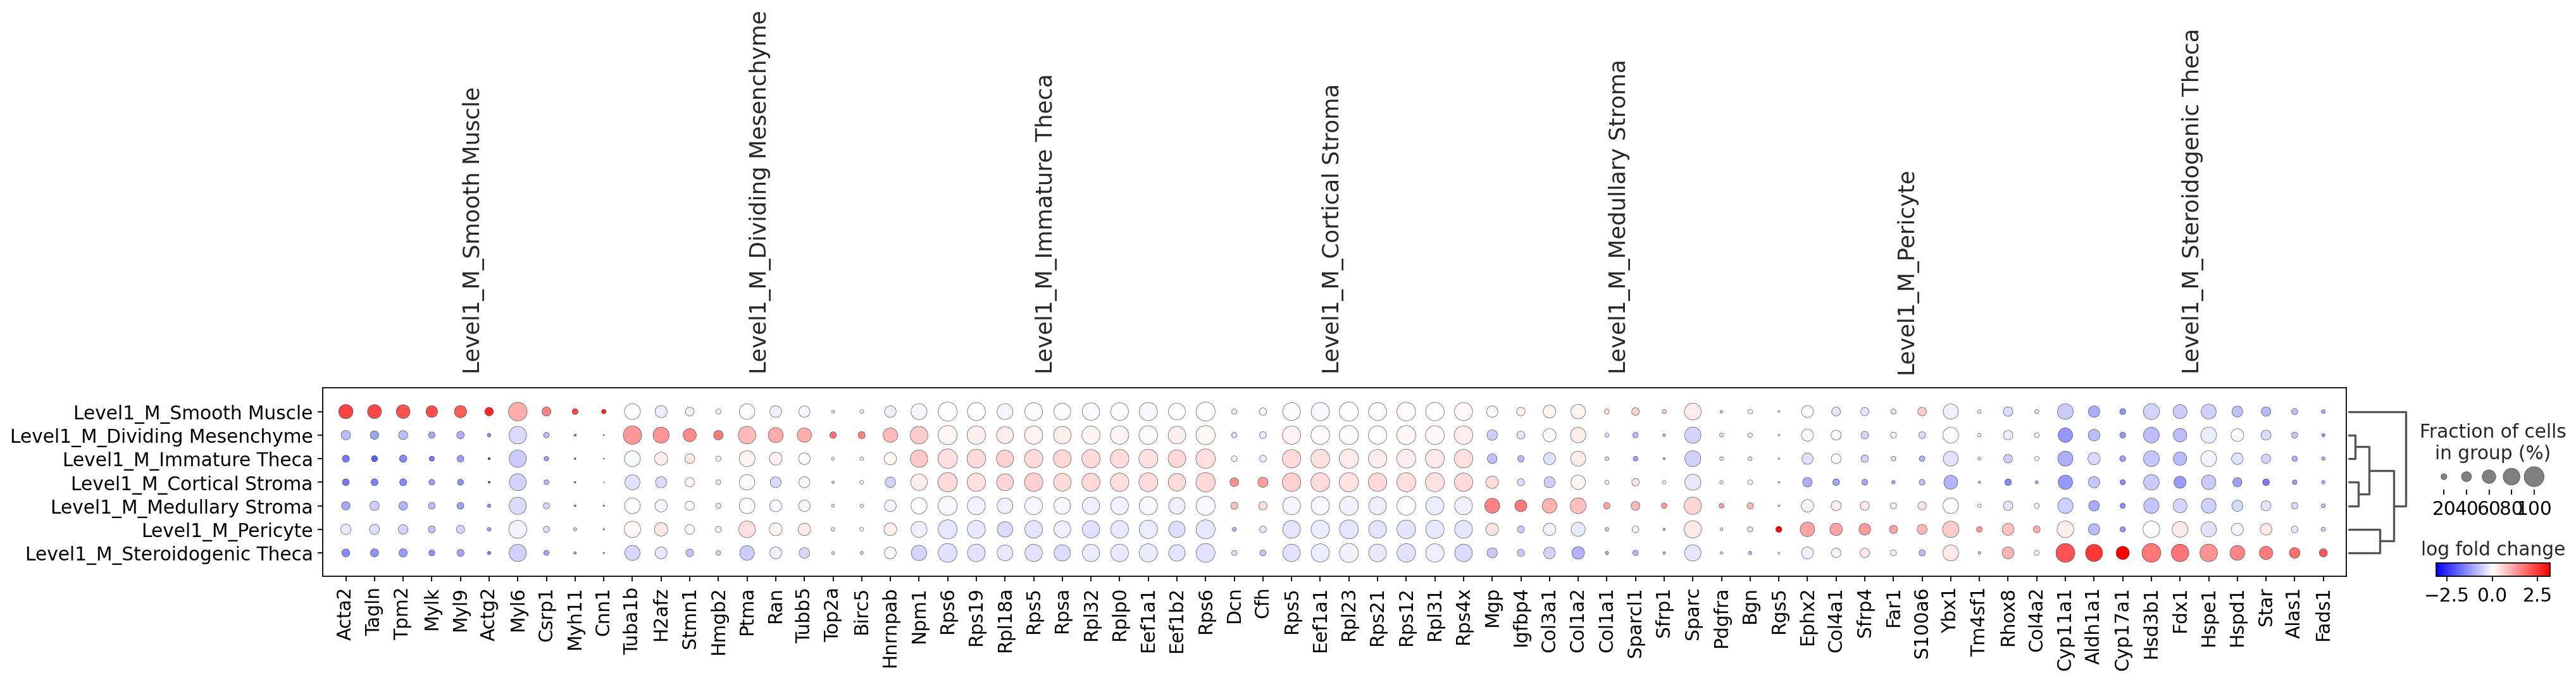

In [36]:
sc.settings.set_figure_params(dpi=80, fontsize=16, facecolor='white', frameon=True, figsize=(8, 5))
sc.pl.rank_genes_groups_dotplot(mesenchyme, n_genes=10, key="rank_gene_groups_mesenchyme_max_pred_celltype", values_to_plot='logfoldchanges', cmap='bwr')
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))

In [37]:
mesenchyme.obs["mesenchyme_max_pred_celltype_reduced"] = mesenchyme.obs["mesenchyme_max_pred_celltype"]
celltypes = {'Level1_M_Smooth Muscle': 'M_Smooth muscle',
             'Level1_M_Steroidogenic Theca': "M_Theca cells",
             'Level1_M_Immature Theca': "M_Theca cells",
             'Level1_M_Cortical Stroma': "M_Fibroblast-like cells",
             'Level1_M_Medullary Stroma': "M_Fibroblast-like cells",
             'Level1_M_Pericyte': "M_Pericytes",
             'Level1_M_Dividing Mesenchyme':'M_Dividing mesenchyme'}
mesenchyme.obs["mesenchyme_max_pred_celltype_reduced"] = mesenchyme.obs["mesenchyme_max_pred_celltype_reduced"].map(celltypes).astype("category")

In [38]:
mesenchyme.obs["mesenchyme_max_pred_celltype_reduced"] = mesenchyme.obs["mesenchyme_max_pred_celltype_reduced"].cat.reorder_categories(["M_Smooth muscle", "M_Theca cells", "M_Fibroblast-like cells", 'M_Dividing mesenchyme', "M_Pericytes"])

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


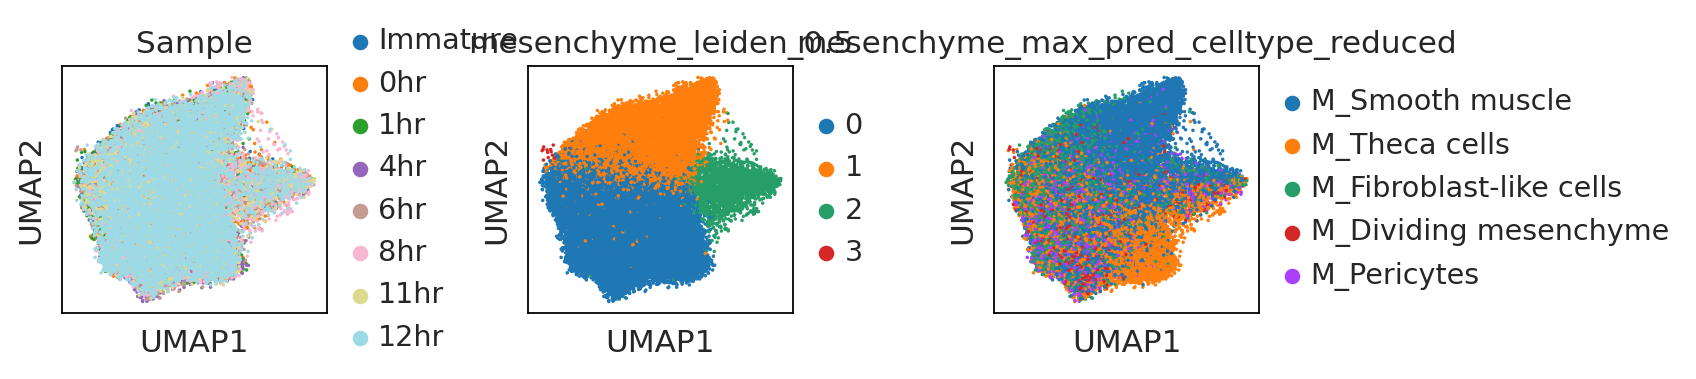

In [39]:
sc.pl.umap(mesenchyme, color = ["Sample", "mesenchyme_leiden_0.5", "mesenchyme_max_pred_celltype_reduced"], ncols=4, wspace=0.6, size = 10)

In [40]:
sc.tl.rank_genes_groups(mesenchyme, groupby="mesenchyme_max_pred_celltype_reduced", key_added="rank_gene_groups_mesenchyme_max_pred_celltype_reduced")

ranking genes
    finished: added to `.uns['rank_gene_groups_mesenchyme_max_pred_celltype_reduced']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [41]:
result = mesenchyme.uns['rank_gene_groups_mesenchyme_max_pred_celltype_reduced']
groups = result['names'].dtype.names
dge_results = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names']}).head(100)
print(dge_results.head(50))

   M_Smooth muscle_names M_Theca cells_names M_Fibroblast-like cells_names  \
0                  Acta2             Aldh1a1                           Mgp   
1                  Tagln             Cyp17a1                        Igfbp4   
2                   Tpm2             Cyp11a1                           Dcn   
3                   Mylk              Hsd3b1                        Col1a2   
4                   Myl9               Hspe1                           Cfh   
5                  Actg2                Fdx1                       Sparcl1   
6                   Myl6               Hspd1                        Col3a1   
7                  Csrp1                Star                         Sfrp1   
8                  Myh11               Alas1                        Col1a1   
9                   Cnn1               Fads1                        Pdgfra   
10                  Tpm1              mt-Nd2                           Bgn   
11                  Dstn                Inha                    

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_mesenchyme_max_pred_celltype_reduced']`


/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


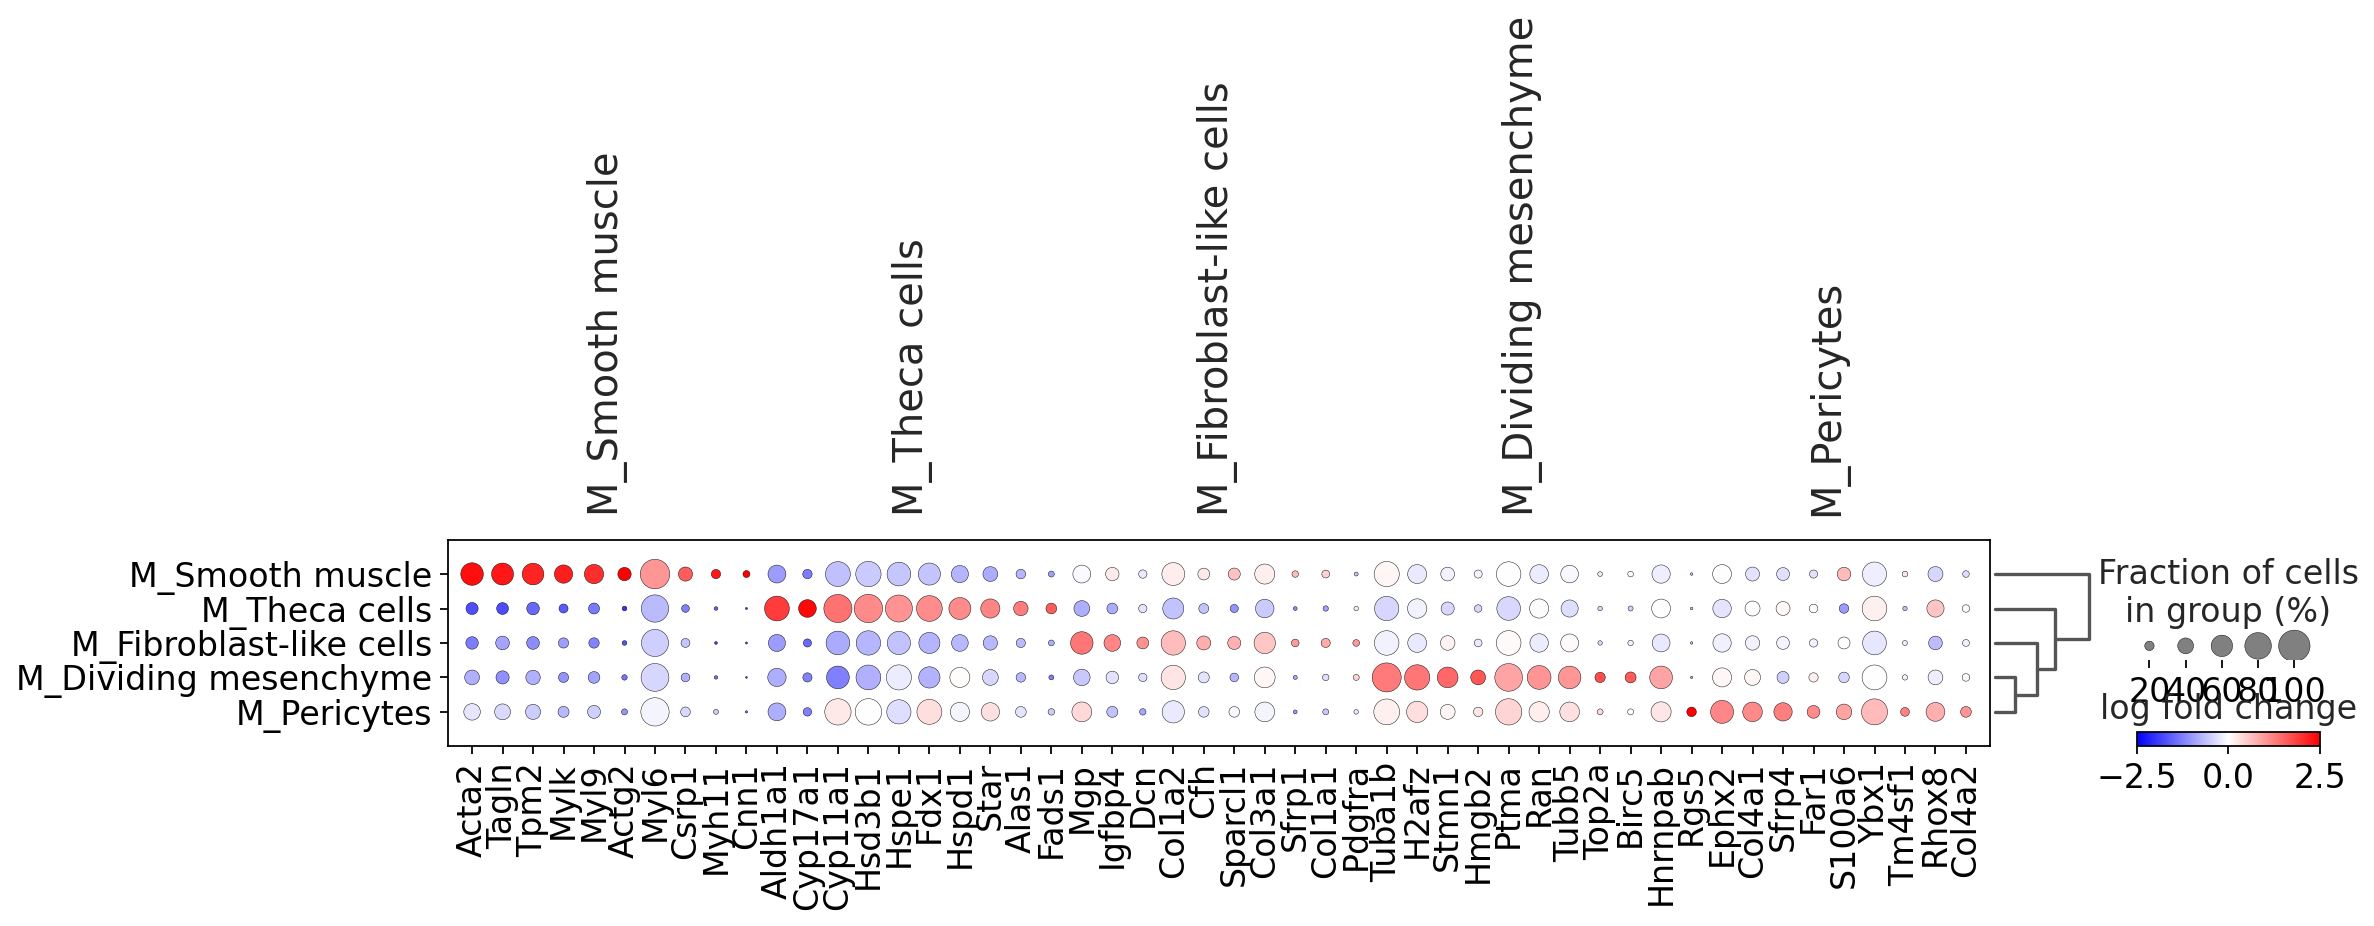

In [42]:
sc.settings.set_figure_params(dpi=80, fontsize=18, facecolor='white', frameon=True, figsize=(8, 5))
sc.pl.rank_genes_groups_dotplot(mesenchyme, n_genes=10, key="rank_gene_groups_mesenchyme_max_pred_celltype_reduced", values_to_plot='logfoldchanges', cmap='bwr', vmin = -2.5, vmax = 2.5, figsize = (15,1.7), save="mesenchyme_subtype_markers")
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))

In [43]:
mesenchyme.write_h5ad("./../../pyobjs_github/mesenchyme1.h5ad")

In [7]:
mesenchyme = sc.read_h5ad("./../../pyobjs_github/mesenchyme1.h5ad")

In [44]:
freq_table = mesenchyme.obs.groupby(['Sample', 'mesenchyme_max_pred_celltype_reduced']).size().reset_index(name='count')
# freq_table = freq_table[~freq_table["Follicle_type"].isin(["Transitioning"])]
freq_table['total_count'] = freq_table.groupby(["Sample"])['count'].transform('sum')
freq_table['proportion'] = freq_table['count'] / freq_table['total_count']
freq_table["Sample"] = freq_table["Sample"].astype("category")
freq_table["Sample"] = freq_table["Sample"].cat.reorder_categories(["Immature", "0hr", "1hr", "4hr", "6hr", "8hr", "11hr", "12hr"])
freq_table["Sample"] = freq_table["Sample"].cat.rename_categories({"Immature": "Untreated", "0hr": "0h", "1hr": "1h", "4hr": "4h", "6hr": "6h", "8hr": "8h", "11hr": "11h", "12hr": "12h"})
# freq_table["Follicle_type"] = freq_table["Follicle_type"].astype("category")
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.remove_categories(["Transitioning"])
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.reorder_categories(["Preantral", "Antral", "Atretic", "Lytic"])

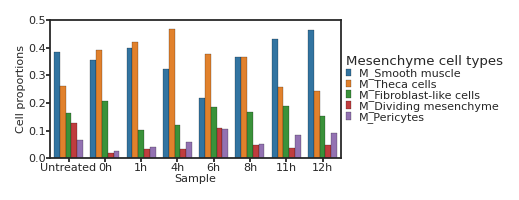

In [47]:
sc.settings.set_figure_params(dpi=80, fontsize=5, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (3.2,1.2))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size = 2)
sns.barplot(freq_table, y = "proportion", x = "Sample", hue="mesenchyme_max_pred_celltype_reduced",  dodge=True, palette="tab10", ax=ax, 
           linewidth=0.1, edgecolor="black")
ax.get_legend().remove()
plt.legend(ncol=1, prop={'size': 5}, handletextpad=0.7, markerscale = 0.6, title = "Mesenchyme cell types",
           labelspacing = 0.0, frameon = False,  title_fontsize = 6, alignment = "left", loc = 6,
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (1.01, 0.5))
plt.rcParams['legend.title_fontsize'] = 9
ax.set_ylim(0,0.5)
ax.set_ylabel("Cell proportions", labelpad = 1.0)
ax.set_xlabel("Sample", labelpad = 0.5)
plt.tight_layout()
plt.savefig("./figures/mesenchyme_stats.pdf")

In [667]:
# smooth_muscle = mesenchyme[mesenchyme.obs["mesenchyme_max_pred_celltype_reduced"].isin(["M_Smooth muscle"])]
smooth_muscle = mesenchyme
smooth_muscle = smooth_muscle.raw.to_adata()[~smooth_muscle.obs["Sample"].isin(["Immature", "4hr", "8hr_replicate"])]

In [668]:
correlation_df = pd.read_csv("./../pyobjs/correlations_magic_full_level0_mesenchyme_pred.csv", index_col=0)
mesenchyme_genes = correlation_df[correlation_df["correlation"]>0.5]["gene"].values
print(len(mesenchyme_genes))
print(correlation_df.loc["Aldh1a1"])

1505
gene            Aldh1a1
correlation    0.553914
means          2.138859
dispersions    3.352366
Name: Aldh1a1, dtype: object


In [669]:
print(correlation_df.loc["Star"])

gene               Star
correlation    0.017981
means          2.586484
dispersions    3.454934
Name: Star, dtype: object


In [670]:
# correlation_df = pd.read_csv("./../pyobjs/correlations_magic_full_level1_smoothmuscle_pred.csv", index_col=0)
# mesenchyme_genes = correlation_df[correlation_df["correlation"]>0.0]["gene"].values
# print(len(mesenchyme_genes))
# print(correlation_df.loc["Aldh1a1"])

In [671]:
smooth_muscle = smooth_muscle[:,mesenchyme_genes]
smooth_muscle.shape

(30226, 1505)

In [672]:
smooth_muscle.obs["timepoint_index"] = smooth_muscle.obs["Sample"]
celltypes = {#'Immature': -1,
             '0hr': 1, 
            '1hr': 2, 
#             '4hr': 3, 
            '4hr_replicate': 3, 
            '6hr': 4, 
            '8hr': 5,
#             '8hr_replicate': 5, 
            '11hr': 6,
            '12hr': 7}
smooth_muscle.obs["timepoint_index"] = smooth_muscle.obs["timepoint_index"].map(celltypes)
smooth_muscle.obs["timepoint"] = smooth_muscle.obs["Sample"]
celltypes = {#'Immature': -1,
             '0hr': 0, 
            '1hr': 1, 
#             '4hr': 4, 
            '4hr_replicate': 4, 
            '6hr': 6, 
            '8hr': 8,
#             '8hr_replicate': 8, 
            '11hr': 11,
            '12hr': 12}
smooth_muscle.obs["timepoint"] = smooth_muscle.obs["timepoint"].map(celltypes)
smooth_muscle.obs["timepoint"] = smooth_muscle.obs["timepoint"].astype(int)

/tmp/ipykernel_3182680/3647506909.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  smooth_muscle.obs["timepoint_index"] = smooth_muscle.obs["Sample"]


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


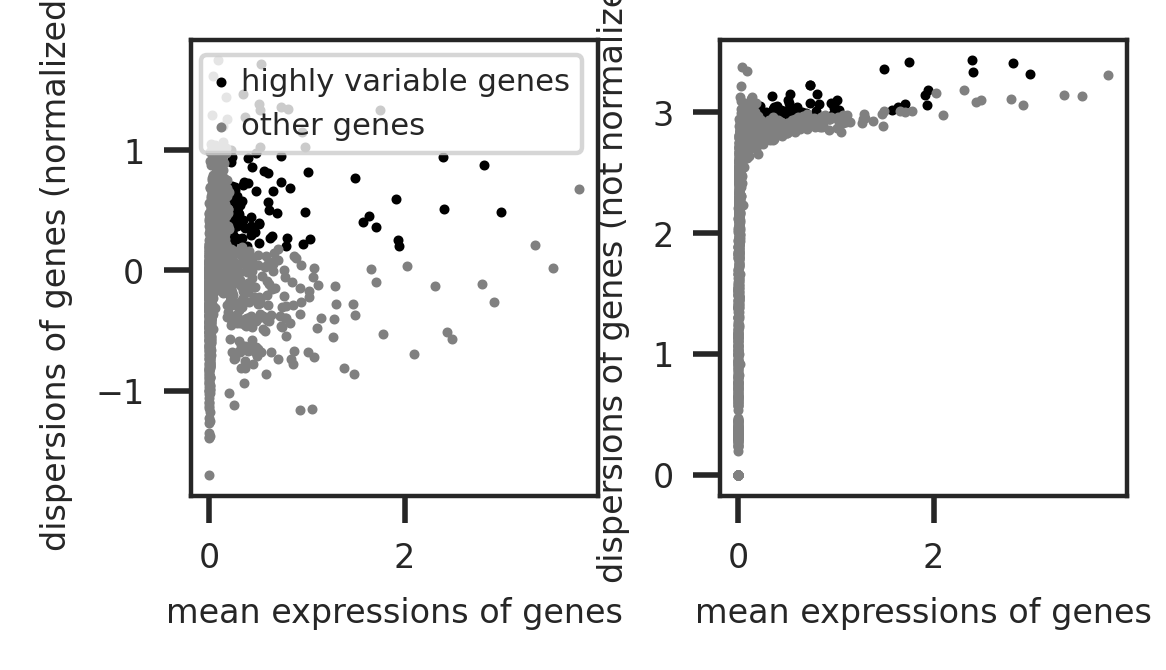

95

In [673]:
sc.pp.highly_variable_genes(smooth_muscle, batch_key="Sample", min_disp=0.2, min_mean=0.2)
sc.pl.highly_variable_genes(smooth_muscle)
gene_list = list(smooth_muscle.var_names[smooth_muscle.var.highly_variable])
len(gene_list)

In [674]:
mural_path = ['M_Smooth muscle']
trend_results = scGAM.compute_gene_trends(smooth_muscle, var_key="timepoint", genes = gene_list, n_bins = 0, use_raw = False, lineages_paths={"SmoothMuscle":mural_path}, group_by = "mesenchyme_max_pred_celltype_reduced")

Preparing...
SmoothMuscle :  ['M_Smooth muscle']
Time for processing SmoothMuscle: 2.1760034640630086 minutes


In [675]:
trends = trend_results['SmoothMuscle']['trend']

In [676]:
clusters = scGAM.Agglomerative_cluster_gene_trends_from_lineage(trends, n_clusters=6, scale=True)
clusters.value_counts()

0    25
1    16
4    14
3    14
5    13
2    13
dtype: int64

In [677]:
from pygam import LinearGAM, s
import numpy as np
import pandas as pd
import time
from collections import OrderedDict
from joblib import delayed, Parallel
from sklearn.preprocessing import StandardScaler
import scanpy as sc
import seaborn as sns

In [678]:
def plot_gene_expression_trend_clusters(trends, cluster_ids, scale = True):
    if scale: 
        trends_df = pd.DataFrame(
            StandardScaler().fit_transform(trends.T).T,
            index=trends.index,
            columns=trends.columns,
        ).T
    else:
        trends_df = trends.T
    trends_df = trends_df.stack().reset_index().rename(columns = {"level_0": "timepoint", "level_1":"Gene", 0: "Expression"})
    trends_df["Cluster"] = [cluster_ids[x] for x in trends_df["Gene"]]
    return trends_df
def plot_gene_expression_trends(trends, genes, scale = True):
    if scale: 
        trends_df = pd.DataFrame(
            StandardScaler().fit_transform(trends.T).T,
            index=trends.index,
            columns=trends.columns,
        ).T[genes]
    else:
        trends_df = trends.T[genes]
    trends_df = trends_df.stack().reset_index().rename(columns = {"level_0": "timepoint", "level_1":"Gene", 0: "Expression"})
    return trends_df

In [711]:
trends_df = plot_gene_expression_trend_clusters(trends = trends, cluster_ids=clusters, scale=True)

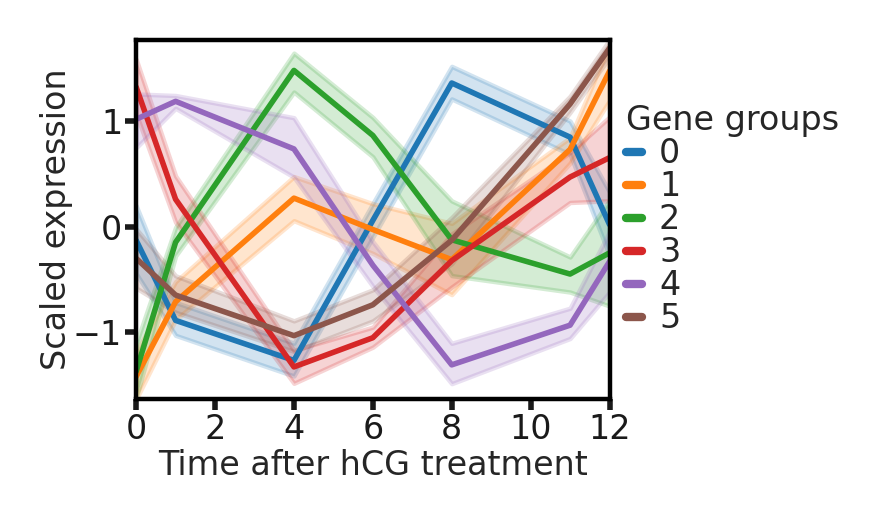

In [713]:
sc.settings.set_figure_params(dpi=200, dpi_save=200, fontsize=6, facecolor='white', frameon=True, figsize=(1.5, 1.5))
fig, ax = plt.subplots(figsize = (2.2,1.3))
plt.grid(False)
sns.set_style("ticks")
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5, size = 2)
g = sns.lineplot(data = trends_df, x = "timepoint", y= "Expression", hue="Cluster", palette="tab10", lw = 1, ax=ax)
g.set_xticks(range(0, 13, 2))
plt.legend(ncol=1, prop={'size': 6}, loc = 6, handletextpad=0.5, markerscale = 0.6, title = "Gene groups", 
           labelspacing = 0.0, frameon = False, title_fontsize = 6, alignment = "left", 
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (1.02, 0.5))
ax.get_legend().set_title("Gene groups")
ax.set_xlabel("Time after hCG treatment", labelpad=0.5)
ax.set_ylabel("Scaled expression", labelpad=0.0)
plt.tight_layout()
plt.savefig("./figures/mesenchyme_gene_trends.pdf")

In [729]:
trends_df = plot_gene_expression_trends(trends = trends, genes=smooth_muscle.var.loc[clusters[clusters == 2].index.values,:].sort_values(by = "dispersions_norm", ascending = False).index.values[0:10], scale=True)

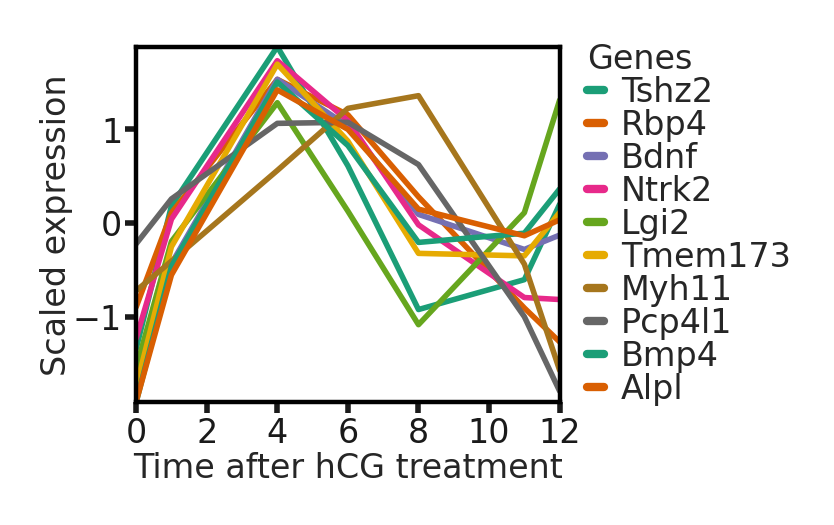

In [730]:
sc.settings.set_figure_params(dpi=200, fontsize=6, facecolor='white', frameon=True, figsize=(5, 5))
fig, ax = plt.subplots(figsize = (2.1,1.3))
plt.grid(False)
sns.set_style("ticks")
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5, size = 2)
g = sns.lineplot(data = trends_df, x = "timepoint", y= "Expression", hue="Gene", palette="Dark2", lw = 1, ax=ax)
g.set_xticks(range(0, 13, 2))
plt.legend(ncol=1, prop={'size': 6}, loc = 6, handletextpad=0.5, markerscale = 0.6, title = "Gene groups", 
           labelspacing = 0.0, frameon = False, title_fontsize = 6, alignment = "left", 
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (1.05, 0.50))
ax.get_legend().set_title("Genes")
ax.set_xlabel("Time after hCG treatment", labelpad=0.5)
ax.set_ylabel("Scaled expression", labelpad=0.0)
plt.tight_layout()
fig.savefig("./figures/smooth_muscle_early_increasing_trends.pdf")

In [716]:
trends_df = plot_gene_expression_trends(trends = trends, genes=smooth_muscle.var.loc[clusters[clusters == 0].index.values,:].sort_values(by = "dispersions_norm", ascending = False).index.values[0:10], scale=True)

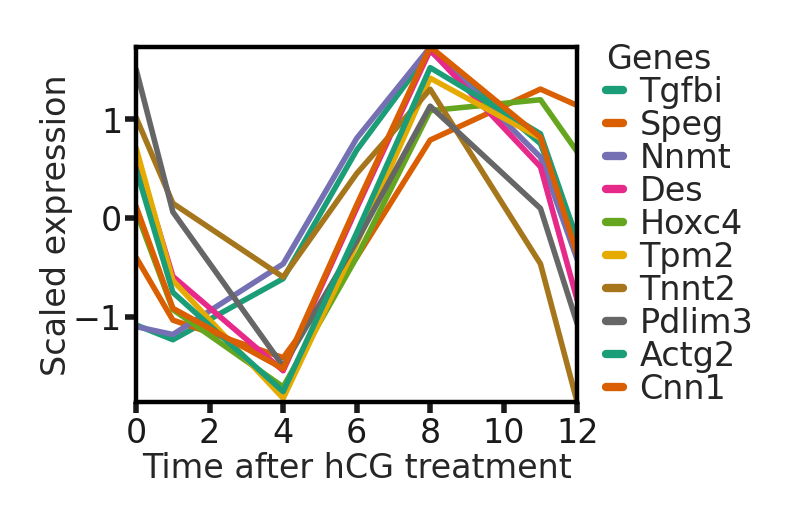

In [717]:
sc.settings.set_figure_params(dpi=200, fontsize=6, facecolor='white', frameon=True, figsize=(5, 5))
fig, ax = plt.subplots(figsize = (2.0,1.3))
plt.grid(False)
sns.set_style("ticks")
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5, size = 2)
g = sns.lineplot(data = trends_df, x = "timepoint", y= "Expression", hue="Gene", palette="Dark2", lw = 1, ax=ax)
g.set_xticks(range(0, 13, 2))
plt.legend(ncol=1, prop={'size': 6}, loc = 6, handletextpad=0.5, markerscale = 0.6, title = "Gene groups", 
           labelspacing = 0.0, frameon = False, title_fontsize = 6, alignment = "left", 
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (1.05, 0.50))
ax.get_legend().set_title("Genes")
ax.set_xlabel("Time after hCG treatment", labelpad=0.5)
ax.set_ylabel("Scaled expression", labelpad=0.0)
plt.tight_layout()
fig.savefig("./figures/smooth_muscle_middle_increasing_trends.pdf")

In [718]:
trends_df = plot_gene_expression_trends(trends = trends, genes=smooth_muscle.var.loc[clusters[clusters == 3].index.values,:].sort_values(by = "dispersions_norm", ascending = False).index.values[0:10], scale=True)

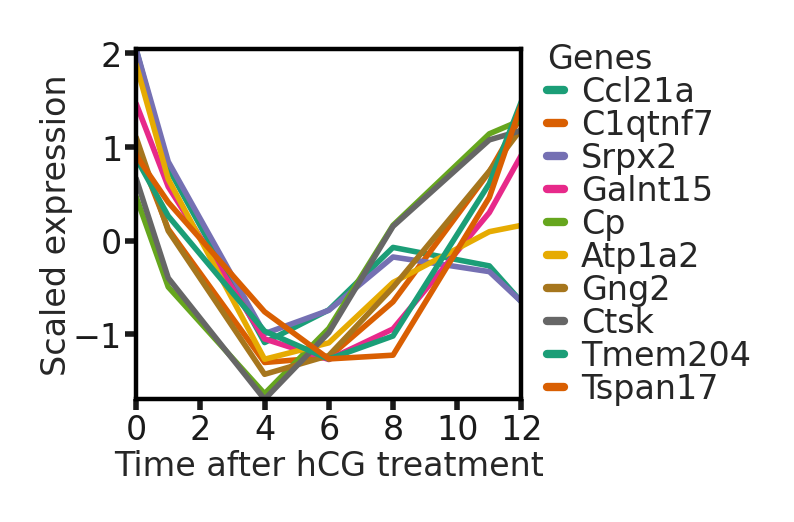

In [719]:
sc.settings.set_figure_params(dpi=200, fontsize=6, facecolor='white', frameon=True, figsize=(5, 5))
fig, ax = plt.subplots(figsize = (2.0,1.3))
plt.grid(False)
sns.set_style("ticks")
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5, size = 2)
g = sns.lineplot(data = trends_df, x = "timepoint", y= "Expression", hue="Gene", palette="Dark2", lw = 1, ax=ax)
g.set_xticks(range(0, 13, 2))
plt.legend(ncol=1, prop={'size': 6}, loc = 6, handletextpad=0.5, markerscale = 0.6, title = "Gene groups", 
           labelspacing = 0.0, frameon = False, title_fontsize = 6, alignment = "left", 
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (1.05, 0.50))
ax.get_legend().set_title("Genes")
ax.set_xlabel("Time after hCG treatment", labelpad=0.5)
ax.set_ylabel("Scaled expression", labelpad=0.0)
plt.tight_layout()
fig.savefig("./figures/smooth_muscle_middlelate_increasing_trends.pdf")

In [720]:
smooth_muscle.var.loc[clusters[(clusters == 5) | (clusters == 5)].index.values,:].sort_values(by = "dispersions_norm", ascending = False).index.values[0:10]

array(['Myom1', 'Sfrp1', 'Akr1b10', 'Arhgap24', 'Lmod1', 'Cd59a', 'Ncam1',
       'S1pr2', 'Elk3', 'Ecscr'], dtype=object)

In [721]:
trends_df = plot_gene_expression_trends(trends = trends, genes=smooth_muscle.var.loc[clusters[(clusters == 5) | (clusters == 5)].index.values,:].sort_values(by = "dispersions_norm", ascending = False).index.values[0:10], scale=True)

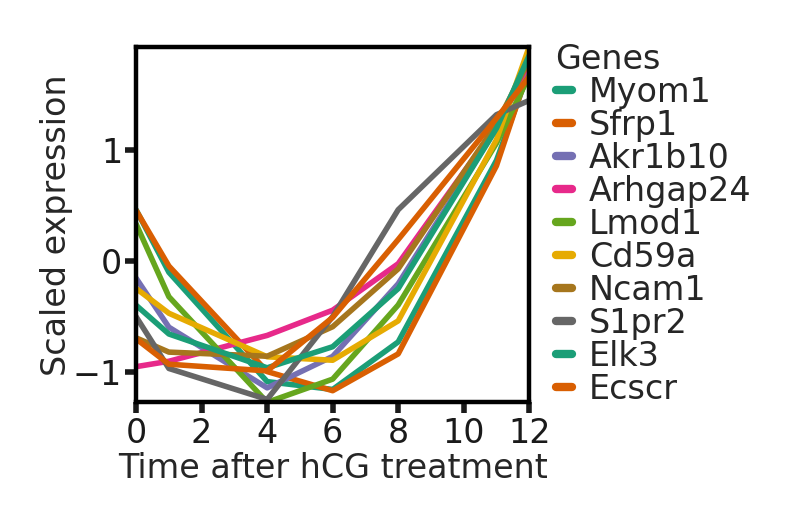

In [722]:
sc.settings.set_figure_params(dpi=200, fontsize=6, facecolor='white', frameon=True, figsize=(5, 5))
fig, ax = plt.subplots(figsize = (2.0,1.3))
plt.grid(False)
sns.set_style("ticks")
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5, size = 2)
g = sns.lineplot(data = trends_df, x = "timepoint", y= "Expression", hue="Gene", palette="Dark2", lw = 1, ax=ax)
g.set_xticks(range(0, 13, 2))
plt.legend(ncol=1, prop={'size': 6}, loc = 6, handletextpad=0.5, markerscale = 0.6, title = "Gene groups", 
           labelspacing = 0.0, frameon = False, title_fontsize = 6, alignment = "left", 
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (1.05, 0.50))
ax.get_legend().set_title("Genes")
ax.set_xlabel("Time after hCG treatment", labelpad=0.5)
ax.set_ylabel("Scaled expression", labelpad=0.0)
plt.tight_layout()
fig.savefig("./figures/smooth_muscle_late_increasing_trends.pdf")

In [723]:
import gseapy
gene_set_names = gseapy.get_library_name(organism='Mouse')

In [740]:
import gseapy
enr_res = gseapy.enrichr(gene_list=list(smooth_muscle.var.loc[clusters[(clusters == 5) | (clusters == 5)].index.values,:].sort_values(by = "dispersions_norm", ascending = False).index.values), 
                     organism='Mouse',
                     gene_sets=['GO_Biological_Process_2021'],
#                      description='pathway', 
                     cutoff = 0.5)

GO_results = enr_res.results
GO_results["-log p-value"] =  -1 * np.log10(GO_results["Adjusted P-value"]) 
GO_results["Term"] = [x.split(" (")[0] for x in GO_results["Term"]]
GO_results[0:50]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,-log p-value
0,GO_Biological_Process_2021,myofibril assembly,2/43,0.000347,0.038698,0,0,88.452328,704.647713,PDGFRB;LMOD1,1.412316
1,GO_Biological_Process_2021,diterpenoid metabolic process,2/64,0.000769,0.038698,0,0,58.431085,419.006821,AKR1B10;RBP1,1.412316
2,GO_Biological_Process_2021,MAPK cascade,3/303,0.000880,0.038698,0,0,19.687000,138.514965,PDGFRB;NCAM1;LGALS9,1.412316
3,GO_Biological_Process_2021,response to interleukin-1,2/86,0.001382,0.038698,0,0,43.080087,283.640874,SFRP1;LGALS9,1.412316
4,GO_Biological_Process_2021,retinoid metabolic process,2/92,0.001580,0.038698,0,0,40.195960,259.287470,AKR1B10;RBP1,1.412316
5,GO_Biological_Process_2021,cellular response to interferon-gamma,2/121,0.002711,0.038698,0,0,30.355997,179.421388,NCAM1;LGALS9,1.412316
6,GO_Biological_Process_2021,muscle contraction,2/129,0.003073,0.038698,0,0,28.432355,164.479600,MYOM1;LMOD1,1.412316
7,GO_Biological_Process_2021,positive regulation of cell population prolife...,3/474,0.003169,0.038698,0,0,12.430573,71.529723,PDGFRB;SFRP1;S1PR2,1.412316
8,GO_Biological_Process_2021,cellular response to heparin,1/5,0.003246,0.038698,0,0,416.312500,2385.602237,SFRP1,1.412316
9,GO_Biological_Process_2021,negative regulation of B cell differentiation,1/5,0.003246,0.038698,0,0,416.312500,2385.602237,SFRP1,1.412316


/tmp/ipykernel_3182680/2137117064.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)
/tmp/ipykernel_3182680/2137117064.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
/tmp/ipykernel_3182680/2137117064.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


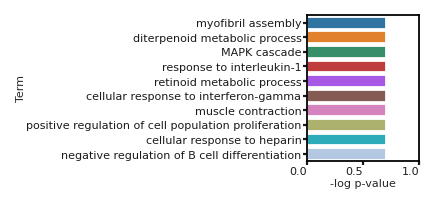

In [742]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=5, facecolor='white', frameon=True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize=(0.9,1.2))
plt.rc('font', size=6)
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5, size = 2)
ax.set_axisbelow(True)
plt.grid(b=None)
g = sns.barplot(y = "Term", x = "-log p-value", data= GO_results[0:10], ax=ax)
# from textwrap import wrap
# labels = [x.get_text() for x in ax.get_yticklabels()]
# labels = ['\n'.join(wrap(l, 40)) for l in labels]
# # print(labels)
# ax.set_yticklabels(labels, rotation=0, horizontalalignment='right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_xlabel("-log p-value", labelpad=0.5)
ax.set_ylabel("Term", labelpad=0.0)
plt.xlim(0,2)
plt.tight_layout()
plt.savefig("./figures/mesenhcyme_late_trends_go.pdf")

In [743]:
GO_results.to_csv("./../pyobjs/mesnehcyme_late_increase_goresults.csv")

In [746]:
smooth_muscle.var.loc[clusters[(clusters == 5) | (clusters == 5)].index.values,:].sort_values(by = "dispersions_norm", ascending = False)[["means", "dispersions", "dispersions_norm"]].to_csv("./../pyobjs/mesenchyme_genes_late_increasing.csv")